In [9]:
import numpy as np
import cv2

In [25]:
def calcGrayHist(img):
    channels = [0]
    histSize = [256]
    histRange = [0, 256]
    
    hist = cv2.calcHist([img], channels, None, histSize, histRange)
    
    return hist

In [27]:
def getGrayHistImage(hist):
    histMax = np.max(hist)

    imgHist = np.full((100, 256), 255, dtype=np.uint8)
    for x in range(256):
        pt1 = (x, 100)
        pt2 = (x, 100 - int(hist[x, 0] * 100 / histMax))
        cv2.line(imgHist, pt1, pt2, 0)

    return imgHist

In [21]:
src = cv2.imread(r"N:\개인\박대원\보정(산출물)\img\화질구지바이크.jpg", cv2.IMREAD_GRAYSCALE)

In [5]:
# 히스토그램 평활화 (equalization)

In [22]:
def histgoram_stretching():
    src = cv2.imread(r"N:\개인\박대원\보정(산출물)\img\화질구지바이크.jpg", cv2.IMREAD_GRAYSCALE)
    
    if src is None:
        print('Image load failed!')
        return

    gmin = float(np.min(src))
    gmax = float(np.max(src))

    dst = ((src - gmin) * 255. / (gmax - gmin)).astype(np.uint8)
    
    cv2.imshow('src', src)
    cv2.imshow('srcHist', getGrayHistImage(calcGrayHist(src)))

    cv2.imshow('dst', dst)
    cv2.imshow('dstHist', getGrayHistImage(calcGrayHist(dst)))

    cv2.waitKey()
    cv2.destroyAllWindows()

In [28]:
histgoram_stretching()

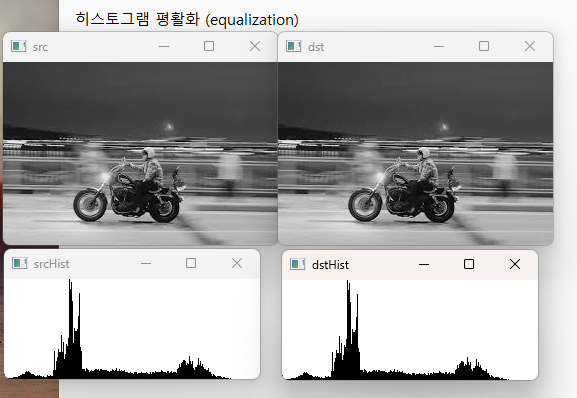

In [10]:
# 밝기 조절

In [ ]:
src = cv2.imread(r"N:\개인\박대원\보정(산출물)\img\화질구지바이크.jpg", cv2.IMREAD_GRAYSCALE)
src.shape
dst = cv2.add(src, 100)
cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

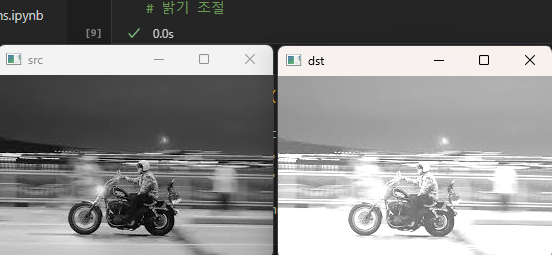

In [12]:
# 스크롤로 밝기 조절

In [13]:
def update(pos):
    dst = cv2.add(src, pos)
    cv2.imshow('dst', dst)
    
cv2.namedWindow('dst')
cv2.createTrackbar('Brightness', 'dst', 0, 100, update)
update(0)

cv2.waitKey()
cv2.destroyAllWindows()

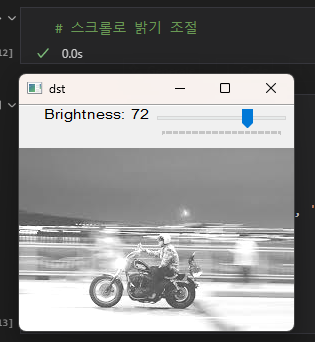

In [14]:
# 명암비 조절

In [15]:
alpha = 1.0
dst = np.clip(src + (src - 128.)*alpha, 0, 255).astype(np.uint8)
cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

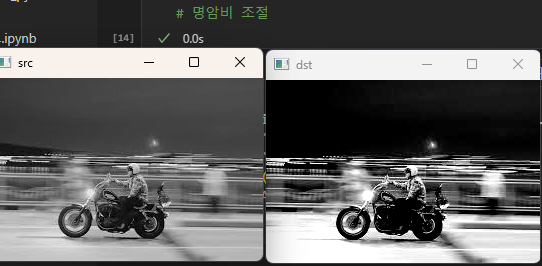

In [16]:
# 이진화

In [ ]:
filename = r"N:\개인\박대원\보정(산출물)\img\화질구지바이크.jpg"

In [37]:
src = cv2.imread(filename, cv2.IMREAD_UNCHANGED)

In [39]:
src.shape

(183, 275, 3)

In [40]:
src = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

In [41]:
src.shape

(183, 275)

In [81]:
def on_threshold(pos):
    _, dst = cv2.threshold(src, pos, 255, cv2.THRESH_BINARY)
    cv2.imshow('dst', dst)

In [82]:
cv2.imshow('src', src)

cv2.namedWindow('dst')
cv2.createTrackbar('Threshold', 'dst', 0, 255, on_threshold)
cv2.setTrackbarPos('Threshold', 'dst', 128)

cv2.waitKey(0)
cv2.destroyAllWindows()

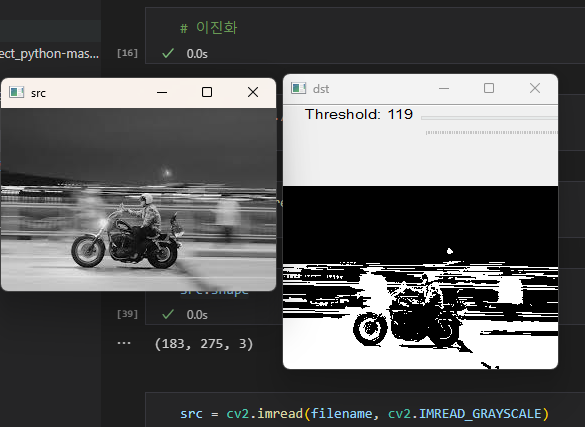

In [43]:
# 엠보싱

In [ ]:
src = cv2.imread(r"N:\개인\박대원\보정(산출물)\img\화질구지바이크.jpg", cv2.IMREAD_GRAYSCALE)

emboss = np.array([[-1, -1, 0],
                   [-1, 0, 1],
                   [0, 1, 1]], np.float32)

dst = cv2.filter2D(src, -1, emboss, delta=128)

cv2.imshow('src', src)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

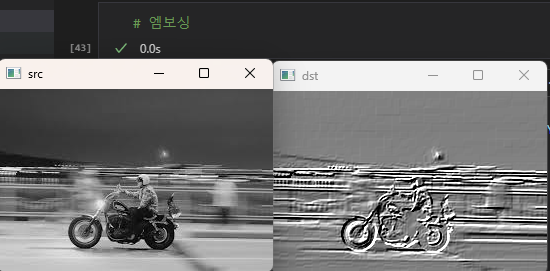

In [46]:
# 블러링

In [ ]:
def blurring_mean():
    src = cv2.imread(r"N:\개인\박대원\보정(산출물)\img\화질구지바이크.jpg", cv2.IMREAD_GRAYSCALE)

    cv2.imshow('src', src)

    for ksize in (3, 5, 7):
        dst = cv2.blur(src, (ksize, ksize))

        desc = "Mean: %dx%d" % (ksize, ksize)
        cv2.putText(dst, desc, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,
                   1.0, 255, 1, cv2.LINE_AA)

        cv2.imshow('dst', dst)
        cv2.waitKey()

    cv2.destroyAllWindows()
blurring_mean()

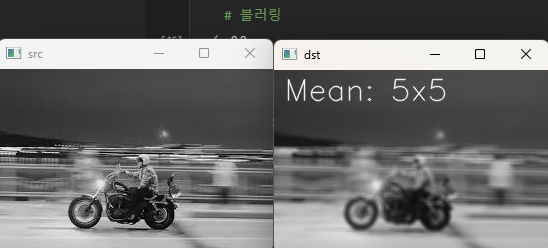

In [50]:
# 가우시안블러

In [ ]:
def blurring_gaussian():
    src = cv2.imread(r"N:\개인\박대원\보정(산출물)\img\화질구지바이크.jpg", cv2.IMREAD_GRAYSCALE)

    cv2.imshow('src', src)

    for sigma in range(1, 6):
        dst = cv2.GaussianBlur(src, (0, 0), sigma)

        desc = "Gaussian: sigma = %d" % (sigma)
        cv2.putText(dst, desc, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,
                   1.0, 255, 1, cv2.LINE_AA)

        cv2.imshow('dst', dst)
        cv2.waitKey()

    cv2.destroyAllWindows()
blurring_gaussian()

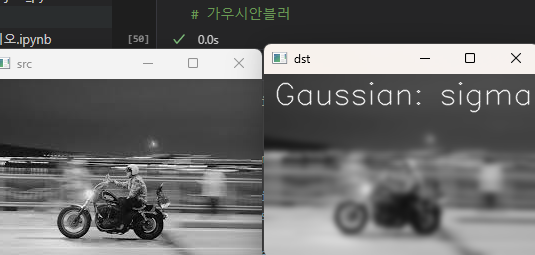

In [ ]:
# 샤프닝

In [ ]:
src = cv2.imread(r"N:\개인\박대원\보정(산출물)\img\화질구지바이크.jpg", cv2.IMREAD_GRAYSCALE)

cv2.imshow('src', src)

for sigma in range(1,50):
    blurred = cv2.GaussianBlur(src, (0, 0), sigma)

    alpha = 1.0
    dst = cv2.addWeighted(src, 1 + alpha, blurred, -alpha, 0.0)

    desc = "sigma: %d" % sigma
    cv2.putText(dst, desc, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,
               1.0, 255, 1, cv2.LINE_AA)

    cv2.imshow('dst', dst)
    cv2.waitKey()

cv2.destroyAllWindows()

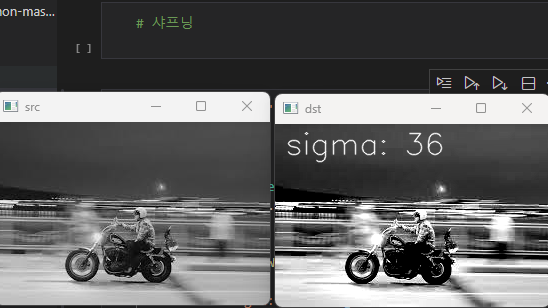

In [57]:
# 노이즈

In [ ]:
def noise_gaussian():
    src = cv2.imread(r"N:\개인\박대원\보정(산출물)\img\화질구지바이크.jpg", cv2.IMREAD_GRAYSCALE)
    
    cv2.imshow('src', src)

    for stddev in [10, 20, 30]:
        noise = np.zeros(src.shape, np.int32)
        cv2.randn(noise, 0, stddev)

        dst = cv2.add(src, noise, dtype=cv2.CV_8UC1)

        desc = 'stddev = %d' % stddev
        cv2.putText(dst, desc, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,
                   1.0, 255, 1, cv2.LINE_AA)
        cv2.imshow('dst', dst)
        cv2.waitKey()

    cv2.destroyAllWindows()
noise_gaussian()

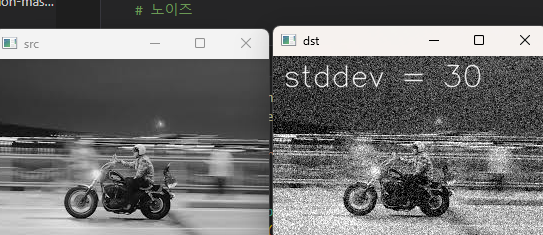

In [64]:
# 양방향 필터링

In [ ]:
def filter_bilateral():
    src = cv2.imread(r"N:\개인\박대원\보정(산출물)\img\화질구지바이크.jpg", cv2.IMREAD_GRAYSCALE)

    noise = np.zeros(src.shape, np.int32)
    cv2.randn(noise, 0, 5)
    cv2.add(src, noise, src, dtype=cv2.CV_8UC1)

    dst1 = cv2.GaussianBlur(src, (0, 0), 5)
    dst2 = cv2.bilateralFilter(src, -1, 10, 5)
    
    cv2.imshow('src', src)
    cv2.imshow('dst1', dst1)
    cv2.imshow('dst2', dst2)
    cv2.waitKey()
    cv2.destroyAllWindows()
filter_bilateral()

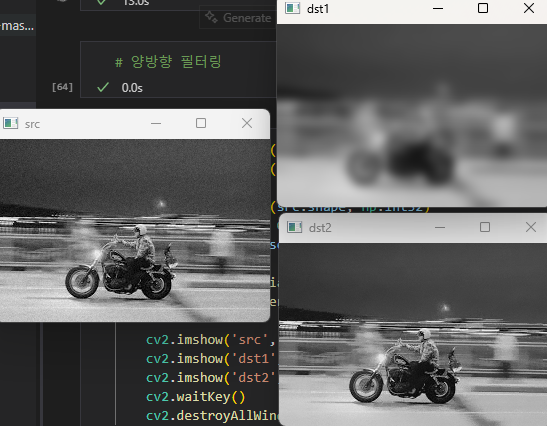

In [ ]:
# 미디언 필터링

In [ ]:
import random
def filter_median():
    src = cv2.imread(r"N:\개인\박대원\보정(산출물)\img\화질구지바이크.jpg", cv2.IMREAD_GRAYSCALE)


    for i in range(0, int(src.size / 10)):
        x = random.randint(0, src.shape[1] - 1)
        y = random.randint(0, src.shape[0] - 1)
        src[x, y] = (i % 2) * 255

    dst1 = cv2.GaussianBlur(src, (0, 0), 1)
    dst2 = cv2.medianBlur(src, 3)

    cv2.imshow('src', src)
    cv2.imshow('dst1', dst1)
    cv2.imshow('dst2', dst2)
    cv2.waitKey()
    cv2.destroyAllWindows()
filter_median()

IndexError: index 234 is out of bounds for axis 0 with size 183

In [ ]:
src = cv2.imread(r"N:\개인\박대원\보정(산출물)\img\화질구지바이크.jpg", cv2.IMREAD_GRAYSCALE)

In [17]:
src.shape

(183, 275)

In [ ]:
def filter_median():
    src = cv2.imread(r"N:\개인\박대원\보정(산출물)\img\화질구지바이크.jpg", cv2.IMREAD_GRAYSCALE)
    
    for i in range(0, int(src.size / 10)):
        x = random.randint(0, src.shape[1] - 1)   # 열
        y = random.randint(0, src.shape[0] - 1)   # 행
        
        src[y, x] = (i % 2) * 180   # ← y, x 순서로 변경 (행, 열)
        # opencv에서는 y가 먼저 인덱싱 되기 때문에 앞으로 y,x 순으로 배열시켜야됨
        # 작은값(183)을 먼저 연산 해서 오류 발생

    # 필터 적용
    dst1 = cv2.GaussianBlur(src, (0, 0), 1)
    dst2 = cv2.medianBlur(src, 3)

    cv2.imshow('src', src)
    cv2.imshow('dst1', dst1)
    cv2.imshow('dst2', dst2)
    cv2.waitKey()
    cv2.destroyAllWindows()

filter_median()

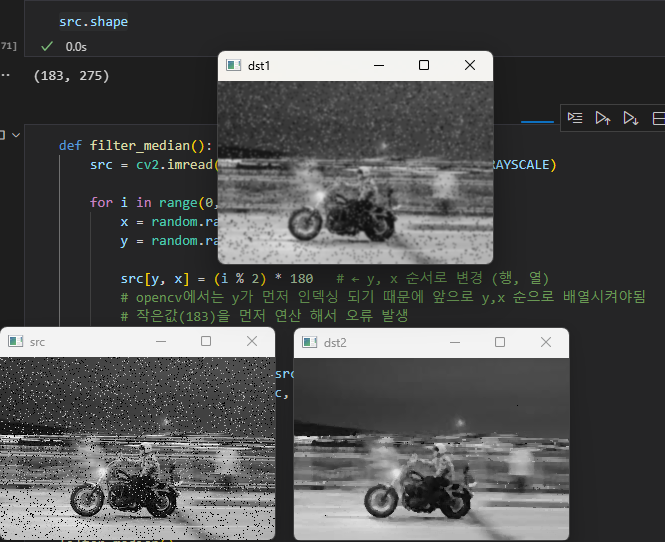

In [ ]:
import numpy as np, cv2

img = cv2.imread(r"N:\개인\박대원\보정(산출물)\img\어두운번호판.png") #이미지 읽기, BGR 스케일

#--① 컬러 스케일을 BGR에서 YUV로 변경
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV) 

#--② YUV 컬러 스케일의 첫번째 채널에 대해서 이퀄라이즈 적용
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0]) 

#--③ 컬러 스케일을 YUV에서 BGR로 변경
img2 = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR) 

cv2.imshow('Before', img)
cv2.imshow('After', img2)
cv2.waitKey()
cv2.destroyAllWindows()

error: OpenCV(4.13.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [ ]:
# 빛 번짐

In [ ]:
#--①이미지 읽어서 YUV 컬러스페이스로 변경
img = cv2.imread(r"N:\개인\박대원\보정(산출물)\img\sunlight_car2.png")
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

#--② 밝기 채널에 대해서 이퀄라이즈 적용
img_eq = img_yuv.copy()
img_eq[:,:,0] = cv2.equalizeHist(img_eq[:,:,0])
img_eq = cv2.cvtColor(img_eq, cv2.COLOR_YUV2BGR)

#--③ 밝기 채널에 대해서 CLAHE 적용
img_clahe = img_yuv.copy()
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8)) #CLAHE 생성
img_clahe[:,:,0] = clahe.apply(img_clahe[:,:,0])           #CLAHE 적용
img_clahe = cv2.cvtColor(img_clahe, cv2.COLOR_YUV2BGR)

#--④ 결과 출력
cv2.imshow('Before', img)
cv2.imshow('CLAHE', img_clahe)
cv2.imshow('equalizeHist', img_eq)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
# 색상(신호) 식별

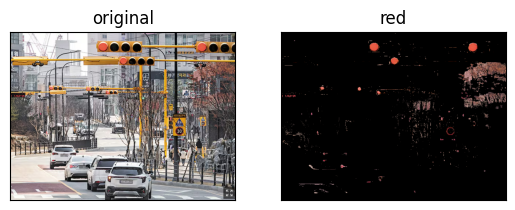

In [ ]:
import cv2
import numpy as np
import matplotlib.pylab as plt

img = cv2.imread(r"N:\개인\박대원\보정(산출물)\img\빨간신호.png")
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

#--② 색상별 영역 지정

red1 = np.array([0, 50,50])
red2 = np.array([10, 255,255])
red3 = np.array([170, 50,50])
red4 = np.array([180, 255,255])

# --③ 색상에 따른 마스크 생성
mask_red = cv2.inRange(hsv, red1, red2)
mask_red2 = cv2.inRange(hsv, red3, red4)

#--④ 색상별 마스크로 색상만 추출
res_red1 = cv2.bitwise_and(img, img, mask=mask_red)
res_red2 = cv2.bitwise_and(img, img, mask=mask_red2)
res_red = cv2.bitwise_or(res_red1, res_red2)

#--⑤ 결과 출력
imgs = {'original': img,'red':res_red,}
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(1,2, i+1)
    plt.title(k)
    plt.imshow(v[:,:,::-1])
    plt.xticks([]); plt.yticks([])
plt.show()


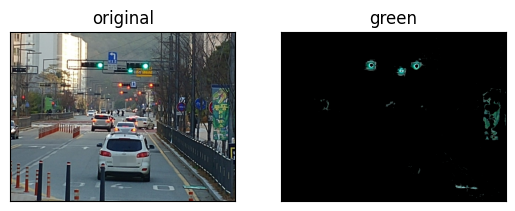

In [ ]:
import cv2
import numpy as np
import matplotlib.pylab as plt

img = cv2.imread(r"N:\개인\박대원\보정(산출물)\img\초록신호.jpg")
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

#--② 색상별 영역 지정

green1 = np.array([75, 50,50])
green2 = np.array([90, 255,255])

# --③ 색상에 따른 마스크 생성
mask_green = cv2.inRange(hsv, green1, green2)

#--④ 색상별 마스크로 색상만 추출
res_green = cv2.bitwise_and(img, img, mask=mask_green)

#--⑤ 결과 출력
imgs = {'original': img, 'green':res_green,}
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(1,2, i+1)
    plt.title(k)
    plt.imshow(v[:,:,::-1])
    plt.xticks([]); plt.yticks([])
plt.show()


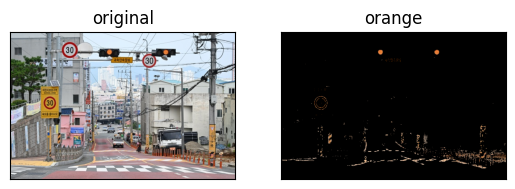

In [ ]:
import cv2
import numpy as np
import matplotlib.pylab as plt

img = cv2.imread(r"N:\개인\박대원\보정(산출물)\img\주황신호.jpg")
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

#--② 색상별 영역 지정

orange1 = np.array([10, 50,50])
orange2 = np.array([15, 255,255])

# --③ 색상에 따른 마스크 생성
mask_orange = cv2.inRange(hsv, orange1, orange2)

#--④ 색상별 마스크로 색상만 추출
res_orange = cv2.bitwise_and(img, img, mask=mask_orange)

#--⑤ 결과 출력
imgs = {'original': img, 'orange':res_orange,}
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(1,2, i+1)
    plt.title(k)
    plt.imshow(v[:,:,::-1])
    plt.xticks([]); plt.yticks([])
plt.show()


In [31]:
# 사람 식별 2진화
ref = cv2.imread(r"N:\개인\박대원\보정(산출물)\img\ref.png", cv2.IMREAD_COLOR)
mask = cv2.imread(r"N:\개인\박대원\보정(산출물)\img\mask.bmp", cv2.IMREAD_GRAYSCALE)
ref_ycrcb = cv2.cvtColor(ref, cv2.COLOR_BGR2YCrCb)

channels = [1, 2]
cr_bins = 128
cb_bins = 128
histSize = [cr_bins, cb_bins]
cr_range = [0, 256]
cb_range = [0, 256]
ranges = cr_range + cb_range

hist = cv2.calcHist([ref_ycrcb], channels, mask, histSize, ranges)

In [32]:
# 사람 식별 2진화
src = cv2.imread(r"N:\개인\박대원\보정(산출물)\img\고속도로갓길_사람.png", cv2.IMREAD_COLOR)
src_ycrcb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)

backproj = cv2.calcBackProject([src_ycrcb], channels, hist, ranges, 1)

cv2.imshow('src', src)
cv2.imshow('backproj', backproj)
cv2.waitKey()
cv2.destroyAllWindows()